In [7]:
from tensorflow.keras.models import load_model
import numpy as np
from tensorflow.keras.preprocessing import image
model = load_model('C:/Users/PRANNOY/Desktop/Jupyter notebooks/liveness_detection_model.h5')

In [2]:
import matplotlib.pyplot as plt

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# create an ImageDataGenerator for data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

# set the batch size
batch_size = 32

# set the paths to the train and test directories
train_path = r'C:\Users\PRANNOY\Downloads\raw\raw\train'
test_path = r'C:\Users\PRANNOY\Downloads\raw\raw\test'

# create the train and test generators
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary'
)

Found 10105 images belonging to 2 classes.
Found 2509 images belonging to 2 classes.


In [4]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# predict classes for the test set
test_generator.reset()
preds = model.predict(test_generator)
print(preds)
# y_true = test_generator.classes

# # plot confusion matrix
# cm = confusion_matrix(y_true, preds.argmax(axis=1))
# plt.imshow(cm, cmap='binary')
# plt.show()

79/79 [==============================] - 401s 5s/step
[[9.9999988e-01]
 [9.9792045e-01]
 [8.2203000e-09]
 ...
 [9.5552248e-01]
 [1.1338402e-02]
 [9.5067305e-09]]


In [5]:
np.set_printoptions(threshold=np.inf)
print(preds)

[[9.99999881e-01]
 [9.97920454e-01]
 [8.22030000e-09]
 [1.68723091e-07]
 [9.57762420e-01]
 [1.76996082e-07]
 [9.96349990e-01]
 [2.03196482e-08]
 [3.66070935e-07]
 [9.99725163e-01]
 [9.98794079e-01]
 [9.46311891e-01]
 [1.77460369e-09]
 [9.21487597e-08]
 [9.99999881e-01]
 [5.74993519e-09]
 [8.66613910e-02]
 [1.00000000e+00]
 [9.99997735e-01]
 [9.16551828e-01]
 [9.99993384e-01]
 [2.32889988e-07]
 [9.97639954e-01]
 [9.24319327e-01]
 [9.99999642e-01]
 [5.75658810e-08]
 [1.18182520e-07]
 [9.32267725e-01]
 [9.42208171e-01]
 [4.84930467e-07]
 [1.92588573e-07]
 [9.53732550e-01]
 [9.99963701e-01]
 [2.56627275e-09]
 [1.00000000e+00]
 [3.18511995e-10]
 [1.28057707e-07]
 [4.68952894e-01]
 [2.00082511e-07]
 [4.00254774e-10]
 [9.99999225e-01]
 [1.67236394e-08]
 [2.36997642e-02]
 [3.67312332e-08]
 [1.73753023e-09]
 [4.19225246e-02]
 [9.99997437e-01]
 [1.15137473e-08]
 [1.60483319e-06]
 [1.00000000e+00]
 [9.99937236e-01]
 [9.99880850e-01]
 [4.81583960e-02]
 [1.00000000e+00]
 [9.99834836e-01]
 [3.254914

1/1 [==============================] - 3s 3s/step


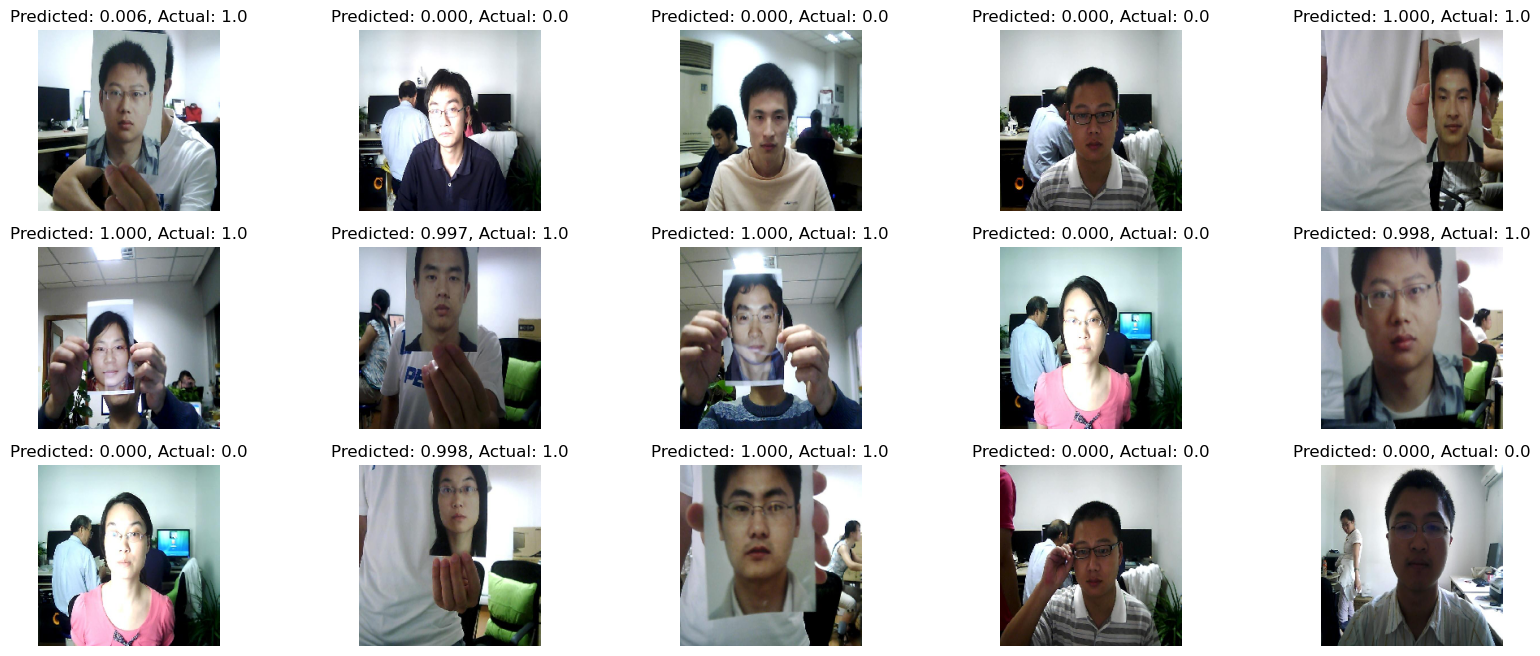

In [6]:
images, labels = next(test_generator)

# make predictions for the batch of images
preds = model.predict(images)

# convert predictions to 0 or 1 based on a threshold of 0.5
##preds = (preds > 0.5).astype(int)

# display the first 10 images along with their predicted labels
fig, axs = plt.subplots(3, 5, figsize=(20, 8))
for i in range(15):
    row = i // 5
    col = i % 5
    axs[row, col].imshow(images[i])
    axs[row, col].set_title(f"Predicted: {preds[i][0]:.3f}, Actual: {labels[i]}")
    axs[row, col].axis("off")
plt.show()

In [9]:
import numpy as np
img = image.load_img('C:\\Users\\PRANNOY\\Downloads\\FjOt_wHaUAEF751.jpeg', target_size=(224, 224))
img1 = image.load_img('C:\\Users\\PRANNOY\\Downloads\\download.jpeg', target_size=(224, 224))
img2 = image.load_img('C:\\Users\\PRANNOY\\Downloads\\spoof.jpeg', target_size=(224, 224))

# convert the image to a numpy array
img_array = image.img_to_array(img1)

# scale the pixel values between 0 and 1
img_array /= 255.0

# reshape the array to match the input shape of the model
img_array = np.reshape(img_array, (1, 224, 224, 3))

# make the prediction
prediction = model.predict(img_array)
print(prediction)
# print the prediction
if prediction <0.5:
    print('The image is real.')
else:
    print('The image is fake.')

1/1 [==============================] - 0s 346ms/step
[[0.9993121]]
The image is fake.


In [10]:
!pip install opencv-python-headless

In [10]:
import cv2
import os
import time

# Create a directory to store the captured photos
if not os.path.exists('C:/Users/PRANNOY/Desktop/Jupyter notebooks/captured_images_faak'):
    os.makedirs('C:/Users/PRANNOY/Desktop/Jupyter notebooks/captured_images_faak')

# Initialize the video capture object
cap = cv2.VideoCapture(0)

# Set the frame width and height
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 640)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 480)

# Set the FPS (frames per second)
fps = 5
interval = 1 / fps

# Set the duration of the video capture in seconds
capture_duration = 15

# Set the frame counter and capture start time
frame_count = 0
capture_start_time = time.time()

# Read frames from the webcam
while True:
    # Get the current time
    current_time = time.time()

    # Check if the capture duration has been reached
    if current_time - capture_start_time >= capture_duration:
        break

    # Read a frame from the webcam
    ret, frame = cap.read()

    # Check if the frame was successfully read
    if not ret:
        break

    # Increment the frame counter
    frame_count += 1

    # Show the live video feed on the screen
    cv2.imshow('Live Feed', frame)

    # Resize the window to fit the screen
    cv2.namedWindow('Live Feed', cv2.WINDOW_NORMAL)
    cv2.resizeWindow('Live Feed', 640, 480)

    # Wait for a key press to continue
    cv2.waitKey(1)

    # Capture every nth frame (in this case, every 10th frame)
    if frame_count % fps == 0:
        # Define the filename for the captured photo
        filename = f'Database/captured_images_faak/frame_{frame_count}.jpg'

        # Save the captured photo to disk
        cv2.imwrite(filename, frame)

    # Wait for the interval before capturing the next frame
    time.sleep(interval)

    # Check if the 'q' key was pressed to quit the program
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video capture object
cap.release()

# Destroy all windows
cv2.destroyAllWindows()


In [13]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import os

# define paths to the folder containing the images and to the pre-trained model
folder_path = r'C:/Users/PRANNOY/Desktop/Jupyter notebooks/captured_images_faak'
model_path = r'C:/Users/PRANNOY/Desktop/Jupyter notebooks/liveness_detection_model.h5'

# load the pre-trained model
model = tf.keras.models.load_model(model_path)

# loop through the images in the folder and make predictions on each one
real_count = 0
fake_count = 0
for file_name in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file_name)
    img = image.load_img(file_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)
    prediction = model.predict(img_array)
    if prediction < 0.5:
        real_count += 1
    else:
        fake_count += 1

# calculate the percentage of real images in the folder
print(real_count)
print(fake_count)
real_percentage = real_count / (real_count + fake_count)
print(real_percentage)
# make a final prediction based on the percentage of real images
if real_percentage >= 0.8:
    print("Real")
else:
    print("Fake")

1/1 [==============================] - 0s 354ms/step
4
8
0.3333333333333333
Fake
